# Pratical session on Image Retrieval

In this practical session, we will explore how to perform typical tasks associated with image retrieval. Students will be able to download this IPython/Jupyter notebook after the class in order to perform the experiments also at home. 

**Link to the slides**: [PDF 30MB](https://www.dropbox.com/s/mjmh8al5wg6731j/18_07_PAISS_practical_session.pdf?dl=0)

## Step 1: Create a new copy of this notebook

In order to follow this tutorial, please create a new copy of this notebook and name your copy using your own name. **Do not run this notebook directly, as it is read-only for students and any changes will not be able to be saved.** To start following this tutorial:


1. Click File -> Make a Copy
1. Wait for the new tab to open
1. Click on the name of the notebook (probably Tutorial-CopyN) and rename it to 'Tutorial-yourname.lastname'.
1. Close the previous tab containing this notebook (in order to avoid any mistakes when following the tutorial)
1. Resume reading this tutorial from this point forward

## Step 2: Basics for executing a Jupyter Notebook:

In order to run a cell, select a cell and press **'shift + enter'**

# Preparatives

We start by importing the necessary modules and fixing a random seed. Please select the cell below and press **'shift+enter'**:

In [1]:
import numpy as np
from numpy.linalg import norm
import torch
from torch import nn
import json
import pdb
import sys
import os.path as osp
import pandas as pd
import sys   
import warnings

from datasets import create
from archs import *
from utils.test import extract_query
from utils.tsne import do_tsne

np.random.seed(0)

print('ready')

ready


Now, let's start by instantiating the Oxford dataset, that we will use in all following experiments.

In [2]:
# create Oxford 5k database
dataset = create('Oxford')

We can now query for some aspects of this dataset, such as the number of images, number of classes, the name of the different classes, and the class label for each of the images in the dataset:

In [3]:
print('Dataset: ' + dataset.dataset_name)
print()

labels = dataset.get_label_vector()
classes = dataset.get_label_names()

print('Number of images:  ' + str(labels.shape[0]))
print('Number of classes: ' + str(classes.shape[0]))
print()
print('Class names: ' + str(classes))

Dataset: Oxford

Number of images:  5063
Number of classes: 11

Class names: ['all_souls' 'ashmolean' 'balliol' 'bodleian' 'christ_church' 'cornmarket'
 'hertford' 'keble' 'magdalen' 'pitt_rivers' 'radcliffe_camera']


Now, let's load a list of models we can use in this tutorial:

In [4]:
# load the dictionary of the available models and features
with open('data/models.json', 'r') as fp:
    models_dict = json.load(fp)

pd.DataFrame(models_dict).T # show the loaded models onscreen

dataset  \
alexnet-cls-imagenet-fc7         data/features/alexnet-cls-imagenet-fc7_ox.npy   
alexnet-cls-lm-fc7                     data/features/alexnet-cls-lm-fc7_ox.npy   
alexnet-cls-lm-gem                         data/features/alexnet-cls-lm_ox.npy   
resnet18-cls-imagenet-gem           data/features/resnet18-cls-imagenet_ox.npy   
resnet18-cls-lm-gem                       data/features/resnet18-cls-lm_ox.npy   
resnet18-cls-imagenet-gem-pcaw  data/features/resnet18-cls-imagenet-pca_ox.npy   
resnet18-cls-lm-gem-pcaw              data/features/resnet18-cls-lm-pca_ox.npy   
resnet18-rnk-lm-gem                       data/features/resnet18-rnk-lm_ox.npy   
resnet18-rnk-lm-gem-da                 data/features/resnet18-rnk-lm-da_ox.npy   
resnet18-rnk-lm-gem-da-mr           data/features/resnet18-rnk-lm-da_mr_ox.npy   
resnet50-cls-imagenet-gem           data/features/resnet50-cls-imagenet_ox.npy   
resnet50-cls-lm-gem                       data/features/resnet50-cls-lm_ox.npy   
resnet50-cls-imagenet-gem-pcaw  data/features/resnet50-cls-imagenet-pca_ox.npy   
resnet50-cls-lm-gem-pcaw              data/features/resnet50-cls-lm-pca_ox.npy   
resnet50-rnk-lm-gem                       data/features/resnet50-rnk-lm_ox.npy   
resnet50-rnk-lm-gem-da                 data/features/resnet50-rnk-lm-da_ox.npy   
resnet50-rnk-lm-gem-da-mr           data/features/resnet50-rnk-lm-da_mr_ox.npy   

                                                                        queries  \
alexnet-cls-imagenet-fc7         data/features/alexnet-cls-imagenet-fc7_oxq.npy   
alexnet-cls-lm-fc7                     data/features/alexnet-cls-lm-fc7_oxq.npy   
alexnet-cls-lm-gem                         data/features/alexnet-cls-lm_oxq.npy   
resnet18-cls-imagenet-gem           data/features/resnet18-cls-imagenet_oxq.npy   
resnet18-cls-lm-gem                       data/features/resnet18-cls-lm_oxq.npy   
resnet18-cls-imagenet-gem-pcaw  data/features/resnet18-cls-imagenet-pca_oxq.npy   
resnet18-cls-lm-gem-pcaw              data/features/resnet18-cls-lm-pca_oxq.npy   
resnet18-rnk-lm-gem                       data/features/resnet18-rnk-lm_oxq.npy   
resnet18-rnk-lm-gem-da                 data/features/resnet18-rnk-lm-da_oxq.npy   
resnet18-rnk-lm-gem-da-mr           data/features/resnet18-rnk-lm-da_mr_oxq.npy   
resnet50-cls-imagenet-gem           data/features/resnet50-cls-imagenet_oxq.npy   
resnet50-cls-lm-gem                       data/features/resnet50-cls-lm_oxq.npy   
resnet50-cls-imagenet-gem-pcaw  data/features/resnet50-cls-imagenet-pca_oxq.npy   
resnet50-cls-lm-gem-pcaw              data/features/resnet50-cls-lm-pca_oxq.npy   
resnet50-rnk-lm-gem                       data/features/resnet50-rnk-lm_oxq.npy   
resnet50-rnk-lm-gem-da                 data/features/resnet50-rnk-lm-da_oxq.npy   
resnet50-rnk-lm-gem-da-mr           data/features/resnet50-rnk-lm-da_mr_oxq.npy   

                                                                    training  \
alexnet-cls-imagenet-fc7                                                 NaN   
alexnet-cls-lm-fc7                                                       NaN   
alexnet-cls-lm-gem                                                       NaN   
resnet18-cls-imagenet-gem                                                NaN   
resnet18-cls-lm-gem                                                      NaN   
resnet18-cls-imagenet-gem-pcaw                                           NaN   
resnet18-cls-lm-gem-pcaw                                                 NaN   
resnet18-rnk-lm-gem                                                      NaN   
resnet18-rnk-lm-gem-da                                                   NaN   
resnet18-rnk-lm-gem-da-mr                                                NaN   
resnet50-cls-imagenet-gem                                                NaN   
resnet50-cls-lm-gem                                                      NaN   
resnet50-cls-imagenet-gem-pcaw                             

# Part 1: Training

In this first part of the tutorial, we will study how different changes in the training pipeline (e.g. choice of model, pooling, and post-processing options) can change the quality of results we obtain.

## a) Creating a network with the AlexNet architecture

As a first step, we will be creating a neural network implementing the AlexNet architecture to use in our experiments.

In [5]:
# instantate the model for the first experiment
model_1a = alexnet_imagenet()

# show the network details
print(model_1a)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

Now, we could use this model to extract features for all images in our dataset. In order to make this faster, we have already precomputed those features and stored them in the disk.

In order to load the features computed by this model from the disk, run the cell below:

In [6]:
dfeats = np.load(models_dict['alexnet-cls-imagenet-fc7']['dataset'])

In [7]:
pd.DataFrame(dfeats)

0         1         2         3         4         5         6     \
0    -0.035850 -0.027481 -0.002729 -0.001876  0.000510 -0.026890 -0.031041   
1    -0.019589 -0.024991  0.003753 -0.016643 -0.001419 -0.025324 -0.030376   
2    -0.031182 -0.015624  0.003333 -0.010716 -0.000947 -0.037874 -0.024973   
3    -0.018782 -0.022565  0.002240 -0.010076 -0.001437 -0.020373 -0.020782   
4    -0.016079 -0.034830 -0.011318 -0.011594 -0.001433 -0.015717 -0.019140   
5    -0.027226 -0.019598  0.002683 -0.018460 -0.002139 -0.034594 -0.020992   
6    -0.020550 -0.007709 -0.000061 -0.010187 -0.000725 -0.028299 -0.022015   
7    -0.025968 -0.023937  0.003283 -0.019003 -0.001922 -0.033658 -0.013863   
8    -0.028738 -0.019763  0.004495 -0.010969 -0.001037 -0.035472 -0.024952   
9    -0.038494  0.011658 -0.000689 -0.011762  0.001312 -0.029404 -0.032518   
10   -0.027081 -0.007277 -0.000806 -0.006623 -0.002354 -0.024626 -0.031134   
11   -0.021348 -0.028567  0.004167 -0.010147 -0.000411 -0.031299 -0.029296   
12   -0.017281 -0.025579  0.010256  0.000060 -0.002708 -0.026455 -0.035257   
13   -0.027684 -0.027197  0.001612 -0.009720 -0.001331 -0.031998 -0.027507   
14   -0.025850 -0.011257 -0.003838 -0.021394 -0.001046 -0.031310 -0.027649   
15   -0.024928  0.005489 -0.006138 -0.019530  0.000773 -0.023293 -0.017519   
16   -0.029517 -0.016332 -0.004522 -0.016007  0.000871 -0.029457 -0.022451   
17   -0.024838 -0.037145  0.000010  0.000810 -0.001789 -0.018664 -0.027436   
18   -0.015125 -0.017970 -0.002840 -0.016026 -0.000481 -0.013773 -0.034277   
19   -0.012851 -0.023673  0.006758 -0.026409 -0.003080 -0.022918 -0.009414   
20   -0.021437 -0.017208  0.006442 -0.009458 -0.002067 -0.024592 -0.027187   
21   -0.026983 -0.025474  0.001393 -0.007402 -0.000908 -0.024785 -0.034075   
22   -0.019076 -0.022870  0.007427 -0.012212 -0.002586 -0.024579 -0.018077   
23   -0.027354 -0.035555 -0.003456 -0.003912 -0.001060 -0.020576 -0.029377   
24   -0.005488 -0.008238 -0.001457 -0.010426 -0.000172 -0.024302 -0.038577   
25   -0.023403 -0.024348  0.004184 -0.010916 -0.003850 -0.020622 -0.021641   
26   -0.019293 -0.033486 -0.006621  0.013770  0.000776 -0.027782 -0.032088   
27   -0.034574 -0.030143 -0.000004 -0.009200  0.000717 -0.023255 -0.030869   
28   -0.018187 -0.021934  0.008050  0.003586 -0.002963 -0.024223 -0.034990   
29   -0.033420 -0.007771  0.001079 -0.013624 -0.000201 -0.019443 -0.026390   
...        ...       ...       ...       ...       ...       ...       ...   
5033 -0.000347 -0.023440  0.001632 -0.006777 -0.002510 -0.008534 -0.018901   
5034 -0.025202 -0.017172 -0.009534 -0.014765 -0.002114 -0.004067 -0.035919   
5035 -0.005361 -0.022537 -0.001587 -0.003194 -0.003594 -0.006201 -0.018159   
5036 -0.020266 -0.016555 -0.008265 -0.016197 -0.002761 -0.013680 -0.028658   
5037 -0.020842 -0.018926 -0.007261 -0.019875 -0.002341 -0.002577 -0.026522   
5038 -0.010701 -0.024621 -0.008893 -0.008442 -0.002328 -0.013485 -0.034279   
5039 -0.017619 -0.013999 -0.008077 -0.012367 -0.003130 -0.000583 -0.020810   
5040 -0.016383 -0.009473 -0.002218  0.004001 -0.003365 -0.007883 -0.020073   
5041 -0.016378 -0.015357 -0.007425 -0.001752 -0.004289  0.003992 -0.028638   
5042 -0.006824 -0.024732  0.002949 -0.022483 -0.003118 -0.010542 -0.017331   
5043 -0.018325 -0.020116 -0.011342 -0.003993 -0.004546 -0.003612 -0.022753   
5044 -0.007036 -0.024572 -0.002254 -0.009914 -0.001902 -0.015593 -0.015422   
5045 -0.011654 -0.020922 -0.001366 -0.006736 -0.003982 -0.005101 -0.033442   
5046 -0.022540 -0.028606  0.002502 -0.012492  0.001526 -0.020187 -0.019245   
5047 -0.026575 -0.023154 -0.000724 -0.029461 -0.003927 -0.020665 -0.030278   
5048 -0.024395 -0.027769 -0.008896 -0.018073  0.000822 -0.012914 -0.030332   
5049 -0.012741  0.003680 -0.005888 -0.032018  0.001434 -0.027847 -0.021405   
5050 -0.016582 -0.020231 -0.011685 -0.010779 -0.001648 -0.017689 -0.039961   
5051 -0.012349 -0.020542  0.009845 -0.018341 -0.004051 -0.026751 -0.012182   
5052 -0.018762 -0.023350 -0.0022

**Question 1**: What does each line of the matrix feats represent?

**Question 2**: Where does the dimension of these lines comes from and how do we extract these features?

_Hint: if you do not know the answers for the questions above, try running the following command:_
```
model_1a_test = alexnet_imagenet_fc7(); print(model_1a_test)
```

Now, assuming that we have already used our network to extract features from all images in the dataset and stored them in the matrix *dfeats* (as done above), we will retrieve the top-15 images that are most similar to a query image. In our example, we will use the following image as a query:

In [8]:
q_idx = 11 # feel free to switch to another number afterwards, but test first with 11

AP=12.73


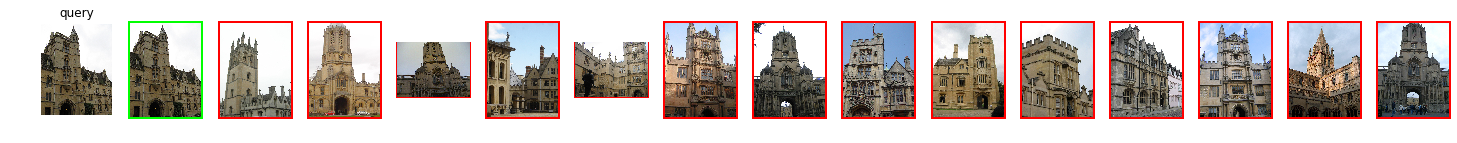

In [9]:
# visualize top results for a given query
dataset.vis_top(dfeats, q_idx, ap_flag=True)

Now we will use the t-SNE algorithm to cluster images together according to feature similarity:

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.013s...
[t-SNE] Computed neighbors for 5063 samples in 4.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.160558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.760330


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.437810
t-SNE done! Time elapsed: 17.399 seconds


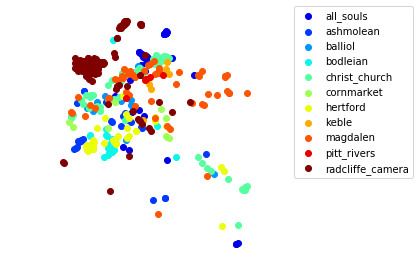

2-dimensional t-sne plot. Press enter to continue


In [10]:
do_tsne(dfeats, labels, classes, sec='1a')

**Question 3**: What can be observe from the t-SNE visualization? Which classes 'cluster' well? Which do not?

## b) Finetuning the created network on the Landmarks dataset

Now, we will see what happens when we fine-tune our off-the-shelf ImageNet network in the Landmarks dataset and then repeat the process above. 

**Question 4**: Should we get better results? What should change? Why?

In [11]:
model_1b = alexnet_lm() # instantate the model that has been fine-tuned in landmarks

print(model_1b) # show the network details

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

Compare with the model we had before:

In [12]:
print(model_1a)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

**Question 5**: Why do we change the last layer of the AlexNet architecture?

**Question 6**: How do we initialize the layers of model_1b for finetuning?

Let's now repeat the same process we had done before, but now using image features that have been extracted using the fine-tuned network.

In [13]:
dfeats = np.load(models_dict['alexnet-cls-lm-fc7']['dataset'])
pd.DataFrame(dfeats)

0         1         2         3         4         5         6     \
0    -0.028551 -0.026623 -0.010203 -0.010896  0.001626 -0.025944 -0.020717   
1    -0.018635 -0.012787 -0.004841 -0.023212 -0.001751 -0.024415 -0.032008   
2    -0.032243 -0.020034  0.004824 -0.005007  0.001027 -0.021642 -0.026012   
3    -0.013617 -0.016270  0.001534 -0.014598 -0.001201 -0.019049 -0.020825   
4    -0.009342 -0.030747 -0.007650 -0.003674 -0.002459 -0.010953 -0.021755   
5    -0.029534 -0.016715  0.000056 -0.010092  0.000297 -0.022919 -0.028175   
6    -0.017982 -0.005457  0.001470 -0.010093  0.000075 -0.019405 -0.028549   
7    -0.021748 -0.017116  0.001957 -0.018670 -0.002048 -0.023776 -0.019693   
8    -0.024694 -0.014167  0.006056 -0.014417 -0.000376 -0.015628 -0.021058   
9    -0.022311  0.019810 -0.007204 -0.024596  0.004135 -0.025079 -0.024800   
10   -0.019029  0.001114 -0.001359 -0.010971 -0.002517 -0.015807 -0.026431   
11   -0.025168 -0.026132  0.004889 -0.008259  0.000814 -0.022118 -0.027081   
12   -0.016623 -0.018003  0.002331 -0.009787 -0.004694 -0.024236 -0.034037   
13   -0.029353 -0.032940  0.007514 -0.004610  0.000361 -0.018311 -0.026966   
14   -0.026197 -0.002524 -0.005353 -0.020280  0.000749 -0.028682 -0.032073   
15   -0.024481  0.012392 -0.008761 -0.025426  0.001896 -0.023800 -0.022350   
16   -0.024368 -0.005999 -0.010947 -0.022314  0.002359 -0.029469 -0.020003   
17   -0.022026 -0.031126  0.003294 -0.000261 -0.001995 -0.011783 -0.027193   
18   -0.007702 -0.009507 -0.005534 -0.025402 -0.000470 -0.004896 -0.026954   
19   -0.003884 -0.023615  0.002270 -0.030834 -0.001828 -0.017886 -0.007803   
20   -0.016494 -0.010600  0.002542 -0.013778 -0.001539 -0.023797 -0.026076   
21   -0.026353 -0.020201 -0.001892 -0.009232  0.001740 -0.018826 -0.031903   
22   -0.016668 -0.017563  0.004384 -0.016031 -0.003232 -0.017060 -0.017542   
23   -0.030964 -0.037219 -0.003955  0.002291 -0.000572 -0.023875 -0.033905   
24    0.000821 -0.000129 -0.003788 -0.025275 -0.000904 -0.012620 -0.030948   
25   -0.018186 -0.016131  0.002393 -0.013781 -0.003109 -0.016193 -0.027394   
26   -0.018845 -0.030311 -0.009118  0.010493 -0.000417 -0.024194 -0.020765   
27   -0.029329 -0.019229 -0.000018 -0.015378  0.001979 -0.026732 -0.029199   
28   -0.012088 -0.015670  0.003648  0.002827 -0.004373 -0.018010 -0.038437   
29   -0.024306  0.009044  0.001023 -0.024701  0.002631 -0.013689 -0.026019   
...        ...       ...       ...       ...       ...       ...       ...   
5033  0.006420 -0.009578 -0.005831 -0.013147 -0.001402 -0.003528 -0.013629   
5034 -0.017702 -0.003512 -0.014482 -0.017439 -0.002590 -0.007487 -0.032187   
5035 -0.006357 -0.014610 -0.005400 -0.004409 -0.003051 -0.000852 -0.020705   
5036 -0.013132 -0.000167 -0.012220 -0.014691 -0.004443 -0.010845 -0.024557   
5037 -0.012219 -0.001765 -0.010703 -0.016852 -0.001854  0.004288 -0.026589   
5038 -0.007859 -0.014488 -0.013675 -0.010781 -0.004298 -0.010800 -0.031975   
5039 -0.017344 -0.005251 -0.011858 -0.014008 -0.002284  0.004483 -0.024964   
5040 -0.011394 -0.007863 -0.010904 -0.002325 -0.002152  0.001368 -0.023616   
5041 -0.018215 -0.009682 -0.011052 -0.003607 -0.002381  0.008844 -0.028112   
5042 -0.010062 -0.014636 -0.002621 -0.022113 -0.002457 -0.006488 -0.020937   
5043 -0.017791 -0.003897 -0.014394 -0.008513 -0.003563  0.002201 -0.023377   
5044 -0.004529 -0.018705 -0.008422 -0.012981 -0.001302 -0.009094 -0.018053   
5045 -0.005670 -0.008784 -0.006269 -0.009022 -0.004010  0.000542 -0.028960   
5046 -0.013359 -0.016650  0.001126 -0.020403  0.000636 -0.016620 -0.009679   
5047 -0.026598 -0.012581 -0.006012 -0.031201 -0.003350 -0.017720 -0.035028   
5048 -0.015849 -0.020363 -0.015536 -0.030947  0.001526 -0.014698 -0.025941   
5049 -0.008075  0.013479 -0.009042 -0.033357  0.004742 -0.023792 -0.014297   
5050 -0.010249 -0.016496 -0.018325 -0.013321 -0.002375 -0.015356 -0.036365   
5051 -0.010399 -0.020552  0.006542 -0.015312 -0.003772 -0.023825 -0.015864   
5052 -0.016141 -0.014292 -0.0044

Visualize the top-15 most similar images:

AP=24.67


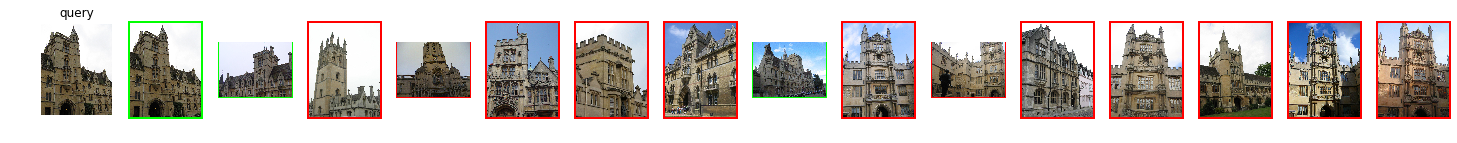

In [14]:
dataset.vis_top(dfeats, q_idx, ap_flag=True)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.018s...
[t-SNE] Computed neighbors for 5063 samples in 3.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.186125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.342979


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.440780
t-SNE done! Time elapsed: 16.703 seconds


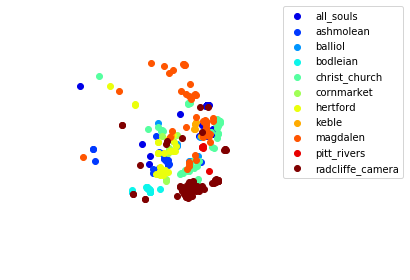

2-dimensional t-sne plot. Press enter to continue


In [15]:
do_tsne(dfeats, labels, classes, sec='1b')

**Question 6**: How does the visualization change after finetuning? What about the top results?

**Question 7**: Why images need to be resized to 224x224 before they can be fed to AlexNet? How can this affect results?

## c) Replacing last max pooling layer with GeM layer

Now, we will replace the last max pooling layer of our network with a GeM layer and see how this affects the results. For this model, we remove all fully connected layers (classifier layers) and replace the last max pooling layer by an aggregation pooling layer (more details about this layer in the next subsection).

In [16]:
model_1c = alexnet_GeM() # instantate the fine-tuned model with a GeM layer instead of max-pooling

print(model_1c) # show the network details. Can you identify what has changed?

AlexNet_RMAC(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): GeneralizedMeanPooling(3, output_size=1)
  )
)


Compare with the model we had before:

In [17]:
print(model_1b) 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

We assume again we have used this model to extract features from all images and stored them in the *dfeats* variable:

In [18]:
dfeats = np.load(models_dict['alexnet-cls-lm-gem']['dataset'])

pd.DataFrame(dfeats)

0         1         2         3         4         5         6     \
0    -0.028551 -0.026623 -0.010203 -0.010896  0.001626 -0.025944 -0.020717   
1    -0.018635 -0.012787 -0.004841 -0.023212 -0.001751 -0.024415 -0.032008   
2    -0.032243 -0.020034  0.004824 -0.005007  0.001027 -0.021642 -0.026012   
3    -0.013617 -0.016270  0.001534 -0.014598 -0.001201 -0.019049 -0.020825   
4    -0.009342 -0.030747 -0.007650 -0.003674 -0.002459 -0.010953 -0.021755   
5    -0.029534 -0.016715  0.000056 -0.010092  0.000297 -0.022919 -0.028175   
6    -0.017982 -0.005457  0.001470 -0.010093  0.000075 -0.019405 -0.028549   
7    -0.021748 -0.017116  0.001957 -0.018670 -0.002048 -0.023776 -0.019693   
8    -0.024694 -0.014167  0.006056 -0.014417 -0.000376 -0.015628 -0.021058   
9    -0.022311  0.019810 -0.007204 -0.024596  0.004135 -0.025079 -0.024800   
10   -0.019029  0.001114 -0.001359 -0.010971 -0.002517 -0.015807 -0.026431   
11   -0.025168 -0.026132  0.004889 -0.008259  0.000814 -0.022118 -0.027081   
12   -0.016623 -0.018003  0.002331 -0.009787 -0.004694 -0.024236 -0.034037   
13   -0.029353 -0.032940  0.007514 -0.004610  0.000361 -0.018311 -0.026966   
14   -0.026197 -0.002524 -0.005353 -0.020280  0.000749 -0.028682 -0.032073   
15   -0.024481  0.012392 -0.008761 -0.025426  0.001896 -0.023800 -0.022350   
16   -0.024368 -0.005999 -0.010947 -0.022314  0.002359 -0.029469 -0.020003   
17   -0.022026 -0.031126  0.003294 -0.000261 -0.001995 -0.011783 -0.027193   
18   -0.007702 -0.009507 -0.005534 -0.025402 -0.000470 -0.004896 -0.026954   
19   -0.003884 -0.023615  0.002270 -0.030834 -0.001828 -0.017886 -0.007803   
20   -0.016494 -0.010600  0.002542 -0.013778 -0.001539 -0.023797 -0.026076   
21   -0.026353 -0.020201 -0.001892 -0.009232  0.001740 -0.018826 -0.031903   
22   -0.016668 -0.017563  0.004384 -0.016031 -0.003232 -0.017060 -0.017542   
23   -0.030964 -0.037219 -0.003955  0.002291 -0.000572 -0.023875 -0.033905   
24    0.000821 -0.000129 -0.003788 -0.025275 -0.000904 -0.012620 -0.030948   
25   -0.018186 -0.016131  0.002393 -0.013781 -0.003109 -0.016193 -0.027394   
26   -0.018845 -0.030311 -0.009118  0.010493 -0.000417 -0.024194 -0.020765   
27   -0.029329 -0.019229 -0.000018 -0.015378  0.001979 -0.026732 -0.029199   
28   -0.012088 -0.015670  0.003648  0.002827 -0.004373 -0.018010 -0.038437   
29   -0.024306  0.009044  0.001023 -0.024701  0.002631 -0.013689 -0.026019   
...        ...       ...       ...       ...       ...       ...       ...   
5033  0.006420 -0.009578 -0.005831 -0.013147 -0.001402 -0.003528 -0.013629   
5034 -0.017702 -0.003512 -0.014482 -0.017439 -0.002590 -0.007487 -0.032187   
5035 -0.006357 -0.014610 -0.005400 -0.004409 -0.003051 -0.000852 -0.020705   
5036 -0.013132 -0.000167 -0.012220 -0.014691 -0.004443 -0.010845 -0.024557   
5037 -0.012219 -0.001765 -0.010703 -0.016852 -0.001854  0.004288 -0.026589   
5038 -0.007859 -0.014488 -0.013675 -0.010781 -0.004298 -0.010800 -0.031975   
5039 -0.017344 -0.005251 -0.011858 -0.014008 -0.002284  0.004483 -0.024964   
5040 -0.011394 -0.007863 -0.010904 -0.002325 -0.002152  0.001368 -0.023616   
5041 -0.018215 -0.009682 -0.011052 -0.003607 -0.002381  0.008844 -0.028112   
5042 -0.010062 -0.014636 -0.002621 -0.022113 -0.002457 -0.006488 -0.020937   
5043 -0.017791 -0.003897 -0.014394 -0.008513 -0.003563  0.002201 -0.023377   
5044 -0.004529 -0.018705 -0.008422 -0.012981 -0.001302 -0.009094 -0.018053   
5045 -0.005670 -0.008784 -0.006269 -0.009022 -0.004010  0.000542 -0.028960   
5046 -0.013359 -0.016650  0.001126 -0.020403  0.000636 -0.016620 -0.009679   
5047 -0.026598 -0.012581 -0.006012 -0.031201 -0.003350 -0.017720 -0.035028   
5048 -0.015849 -0.020363 -0.015536 -0.030947  0.001526 -0.014698 -0.025941   
5049 -0.008075  0.013479 -0.009042 -0.033357  0.004742 -0.023792 -0.014297   
5050 -0.010249 -0.016496 -0.018325 -0.013321 -0.002375 -0.015356 -0.036365   
5051 -0.010399 -0.020552  0.006542 -0.015312 -0.003772 -0.023825 -0.015864   
5052 -0.016141 -0.014292 -0.0044

**Question 8**: Why does the size of the feature representation changes?

**Question 9**: Why does the size of the feature representation is important for a image retrieval task?

Now, let's continue visualizing the top-15 most similar images:

AP=24.67


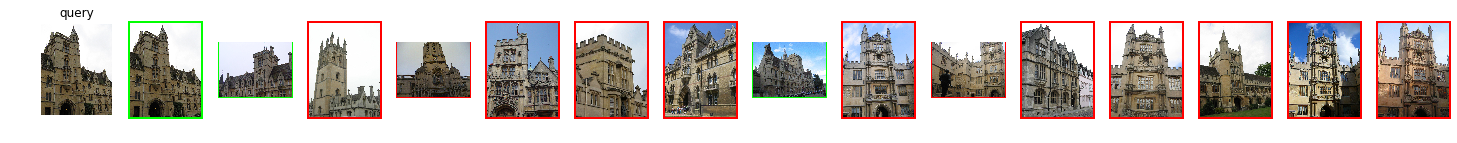

In [19]:
dataset.vis_top(dfeats, q_idx, ap_flag=True)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.012s...
[t-SNE] Computed neighbors for 5063 samples in 3.992s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.186127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.370216


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.440257
t-SNE done! Time elapsed: 17.465 seconds


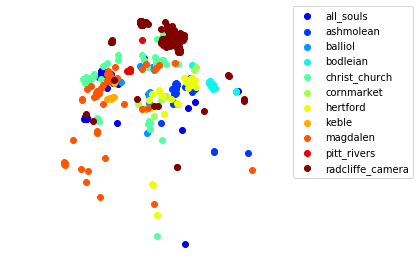

2-dimensional t-sne plot. Press enter to continue


In [20]:
do_tsne(dfeats, labels, classes, sec='1c')

**Question 10**: How does the aggregation layer changes the t-SNE visualization? 
    
**Question 11**: Can we see some structure in the clusters of similarly labeled images?

## d) ResNet18 architecture with GeM pooling

Now, we will replace the base architecture of our network (the backbone) with a ResNet18 architecture.

In [22]:
model_0 = resnet18()      # instantiate one model with average pooling and another 
model_1d = resnet18_GeM() # with GeM pooling with the same ResNet18 architecture

print(model_0.adpool)     # Show how the last layers of the two models are different
print(model_1d.adpool)

AvgPool2d(kernel_size=7, stride=1, padding=0)
GeneralizedMeanPooling(3, output_size=1)


**Question 12**: Why do we change the average pooling layer of the original Resnet18 architecture for a generalized mean pooling? 

**Question 13**: What operation is the layer model_1d.adpool doing?
 * _Hint: You can see the code of the generalized mean pooling in file pooling.py_

Now let's do the same as before and visualize the features and top-15 most similar images to our query:

In [23]:
# load Oxford features from ResNet18 model
dfeats = np.load(models_dict['resnet18-cls-lm-gem']['dataset'])

pd.DataFrame(dfeats)

0         1         2         3         4         5         6    \
0     0.049235  0.022431  0.047216  0.062378  0.041708  0.068025  0.031999   
1     0.053231  0.032049  0.049597  0.043437  0.039488  0.033394  0.021774   
2     0.057501  0.027944  0.052140  0.063856  0.052172  0.032595  0.024531   
3     0.040808  0.045251  0.050115  0.048647  0.046168  0.034828  0.055606   
4     0.034899  0.049185  0.029558  0.044016  0.039963  0.032747  0.028720   
5     0.061548  0.032247  0.056369  0.055257  0.059113  0.021289  0.027008   
6     0.039316  0.023424  0.038405  0.074373  0.062971  0.044045  0.039694   
7     0.034386  0.043056  0.048949  0.067326  0.041427  0.015321  0.044894   
8     0.032050  0.021478  0.042539  0.054630  0.066171  0.034172  0.066291   
9     0.021374  0.032180  0.050659  0.064247  0.046264  0.076480  0.053558   
10    0.048305  0.030720  0.014995  0.042403  0.048953  0.076505  0.047251   
11    0.052389  0.040293  0.041801  0.069704  0.053320  0.017604  0.019037   
12    0.062159  0.045055  0.042221  0.024101  0.041417  0.027622  0.023100   
13    0.057479  0.027956  0.068624  0.047186  0.072639  0.017779  0.026082   
14    0.042386  0.037762  0.020025  0.067526  0.046515  0.053017  0.017741   
15    0.043988  0.034344  0.041288  0.046934  0.043989  0.090952  0.028025   
16    0.045903  0.029599  0.036883  0.057518  0.061207  0.050247  0.027304   
17    0.045133  0.055327  0.031604  0.041743  0.039151  0.029430  0.042323   
18    0.009948  0.026462  0.053290  0.068666  0.039963  0.054351  0.064870   
19    0.052836  0.033369  0.048631  0.054918  0.062258  0.017610  0.047796   
20    0.025190  0.037000  0.062362  0.081975  0.052988  0.046211  0.038731   
21    0.052981  0.040746  0.071113  0.058531  0.036762  0.033979  0.029596   
22    0.039546  0.066824  0.052690  0.063166  0.046672  0.017599  0.050290   
23    0.060162  0.053684  0.036625  0.059097  0.018180  0.032258  0.061339   
24    0.030255  0.041978  0.042063  0.064137  0.032486  0.056736  0.037759   
25    0.059758  0.034778  0.045840  0.051873  0.060621  0.030805  0.037172   
26    0.044607  0.056819  0.037538  0.069904  0.039092  0.044852  0.042999   
27    0.032981  0.056269  0.039720  0.046262  0.016070  0.018767  0.057680   
28    0.068362  0.058189  0.047897  0.027326  0.022377  0.028097  0.030502   
29    0.027224  0.020370  0.038049  0.079323  0.045942  0.071614  0.079799   
...        ...       ...       ...       ...       ...       ...       ...   
5033  0.094876  0.043968  0.032082  0.073121  0.033291  0.011229  0.065510   
5034  0.042912  0.027838  0.027389  0.063157  0.033649  0.034101  0.022280   
5035  0.045916  0.045316  0.015821  0.055587  0.027181  0.025609  0.034290   
5036  0.049711  0.031104  0.029324  0.049437  0.032018  0.038807  0.036050   
5037  0.052921  0.039792  0.034336  0.052253  0.040886  0.034263  0.050049   
5038  0.062253  0.046699  0.031615  0.069565  0.051177  0.025533  0.033272   
5039  0.055283  0.030664  0.033556  0.045175  0.028248  0.035613  0.024820   
5040  0.063772  0.031431  0.015811  0.031318  0.042954  0.019356  0.019779   
5041  0.035097  0.037179  0.012531  0.062548  0.019149  0.023821  0.029720   
5042  0.072295  0.038398  0.033526  0.066397  0.069002  0.019338  0.064806   
5043  0.059429  0.025722  0.031151  0.050727  0.059457  0.032733  0.035633   
5044  0.063554  0.037871  0.030679  0.043550  0.026514  0.012223  0.033911   
5045  0.052719  0.036513  0.027289  0.048598  0.031611  0.029261  0.022995   
5046  0.016138  0.031096  0.028061  0.063224  0.063372  0.058899  0.060867   
5047  0.029550  0.063071  0.031018  0.076916  0.044972  0.020585  0.025646   
5048  0.030939  0.033016  0.024602  0.026833  0.032851  0.022290  0.017199   
5049  0.039134  0.046218  0.044071  0.072048  0.055051  0.041018  0.043325   
5050  0.027360  0.027073  0.032961  0.029905  0.033432  0.046363  0.043793   
5051  0.063640  0.040888  0.060612  0.037578  0.019771  0.019082  0.018471   
5052  0.050988  0.045635  0.05437

Let's use a different image for testing this time:

In [29]:
q_idx = 50

Now, let's visualize the top-15 results for the given query index

AP=92.41


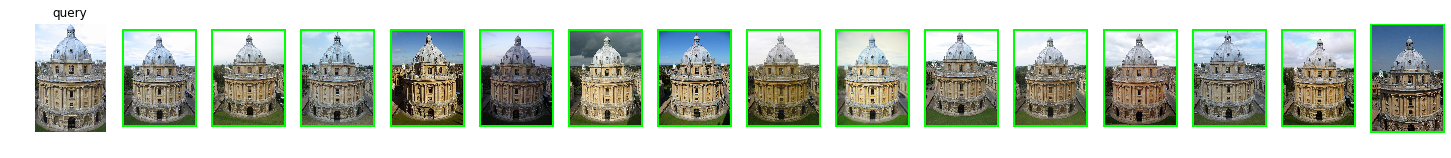

In [40]:
qfeats = np.load(models_dict['resnet18-cls-lm-gem']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.014s...
[t-SNE] Computed neighbors for 5063 samples in 4.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.097422
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.275978


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.361070
t-SNE done! Time elapsed: 15.256 seconds


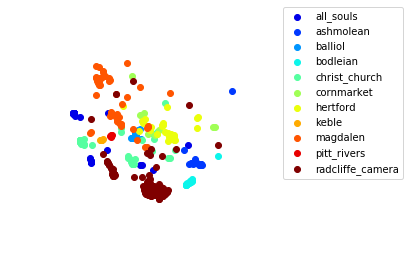

2-dimensional t-sne plot. Press enter to continue


In [26]:
do_tsne(dfeats, labels, classes, sec='1d')

**Question 14**: How does this model compare with model 1c, that was trained in the same dataset for the same task?

**Question 15**: How does is compare to the finetuned models of 1b?

## e) PCA Whitening

Now we will investigate the effects of whitening our descriptors and queries. We will not be changing anything in the network.

AP=90.13


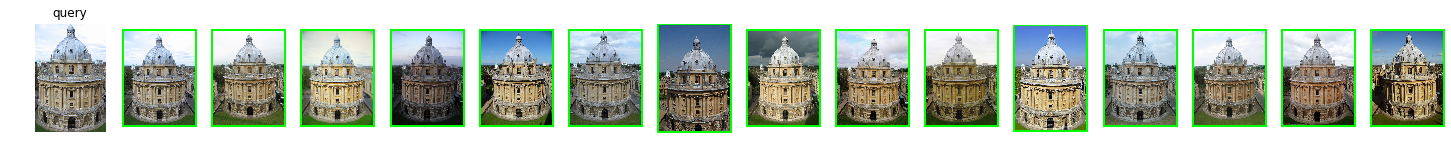

In [30]:
# We use a PCA learnt on landmarks to whiten the output features of 'resnet18-cls-lm-gem'
dfeats = np.load(models_dict['resnet18-cls-lm-gem-pcaw']['dataset'])
qfeats = np.load(models_dict['resnet18-cls-lm-gem-pcaw']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

Visualize the data with t-SNE (excluding unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.011s...
[t-SNE] Computed neighbors for 5063 samples in 4.039s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.198669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.625740


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.831158
t-SNE done! Time elapsed: 21.022 seconds


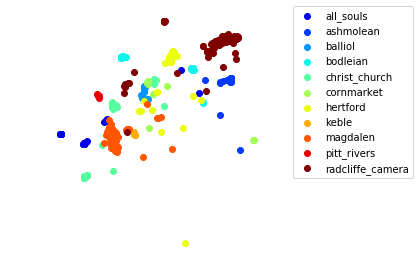

2-dimensional t-sne plot. Press enter to continue


In [31]:
do_tsne(dfeats, labels, classes, sec='1e-1')

Visualize the data with t-SNE (including unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.013s...
[t-SNE] Computed neighbors for 5063 samples in 4.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.199083
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.651733


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.831180
t-SNE done! Time elapsed: 20.156 seconds


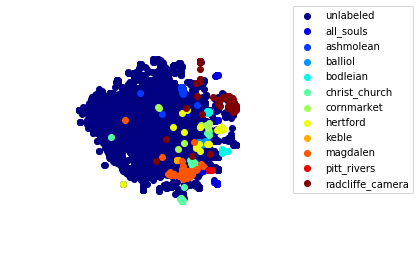

2-dimensional t-sne plot. Press enter to continue


In [32]:
do_tsne(dfeats, labels, classes, sec='1e-2', show_unlabeled=True)

**Question 16**: What can we say about the separation of data when included unlabeled images?

**Question 17**: And the distribution of the unlabeled features?

**Question 18**: How can we train a model to separate labeled from unlabeled data?

## f) Finetuning on Landmarks for retrieval

Now we learn the architecture presented in item e) in an end-to-end manner for the retrieval task. The architecture includes a FC layer that replaces the PCA projection.

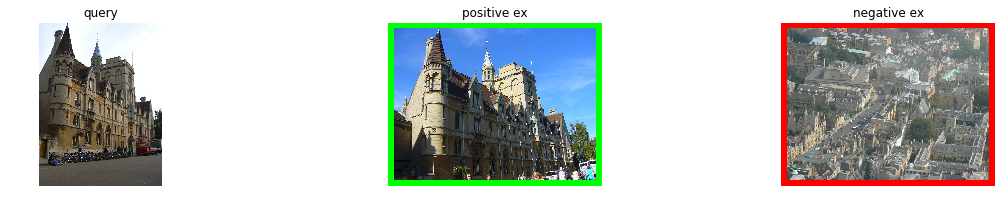

Triplet for landmark balliol. Press enter to continue


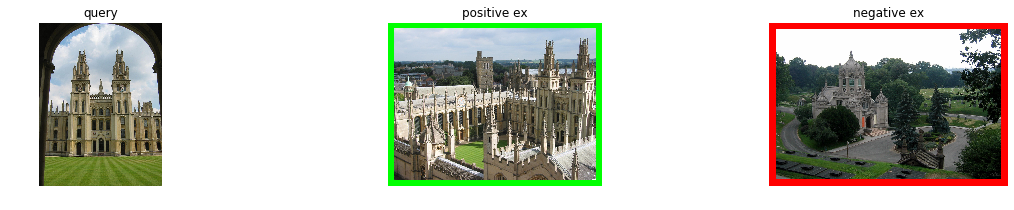

Triplet for landmark all_souls. Press enter to continue


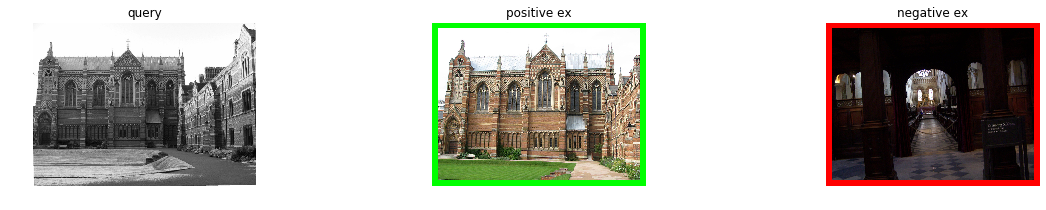

Triplet for landmark keble. Press enter to continue


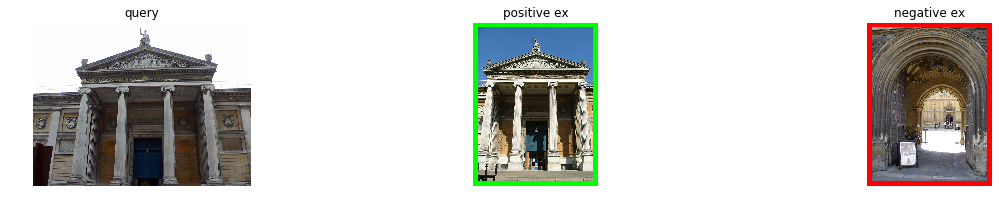

Triplet for landmark ashmolean. Press enter to continue


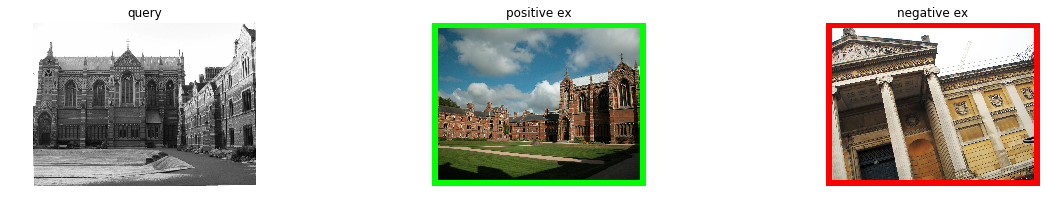

Triplet for landmark keble. Press enter to continue


In [34]:
dataset.vis_triplets(nplots=5) # will print 5 examples of triplets (tuples with a query, a positive, and a negative)

Now, let's visualize the top results as before:

AP=93.46


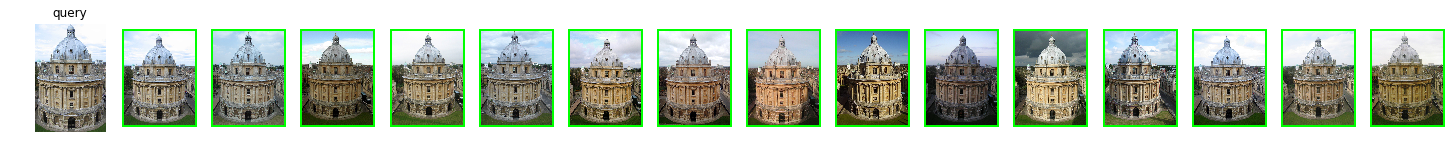

In [35]:
# load Oxford features from ResNet18 model trained with triplet loss
dfeats = np.load(models_dict['resnet18-rnk-lm-gem']['dataset'])
qfeats = np.load(models_dict['resnet18-rnk-lm-gem']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

Visualize the data with t-SNE (excluding unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.014s...
[t-SNE] Computed neighbors for 5063 samples in 4.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.242836
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.277496


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.466747
t-SNE done! Time elapsed: 18.249 seconds


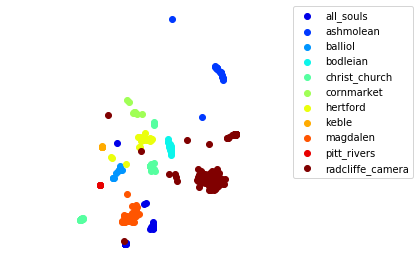

2-dimensional t-sne plot. Press enter to continue


In [36]:
do_tsne(dfeats, labels, classes, sec='1f-1')

Visualize the data with t-SNE (including unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.012s...
[t-SNE] Computed neighbors for 5063 samples in 4.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.242945
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.272514


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.457521
t-SNE done! Time elapsed: 20.821 seconds


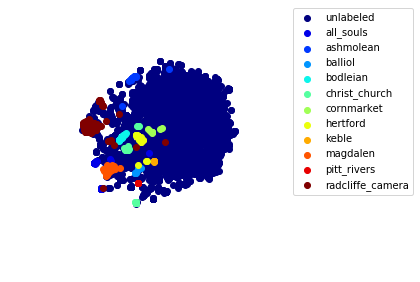

2-dimensional t-sne plot. Press enter to continue


In [37]:
do_tsne(dfeats, labels, classes, sec='1f-1', show_unlabeled=True)

**Question 19**: Compare the plots with unlabeled data of the model trained for retrieval (with triplet loss) and the model trained for classification of the previous subsection. How do they change?

## g) Data augmentation

Let's now check the effects of adding data augmentation techniques to the training. We will now compare models that have been trained with and without data augmentation.

We will load features that have been trained with the following data augmentation: cropping, pixel jittering, rotation, and tilting. This means that this model has been trained with the original image and its transformed versions. Please note that not all transformations might be useful for every class or image, but it is impossible to know in advance how the pictures were taken and the characteristics of each individual class _a priori_.

For example, cropping is useful when the landmark of interest is usually not found at the center of the image (e.g. selfies taken in front of the tour Eiffel).

AP=97.81


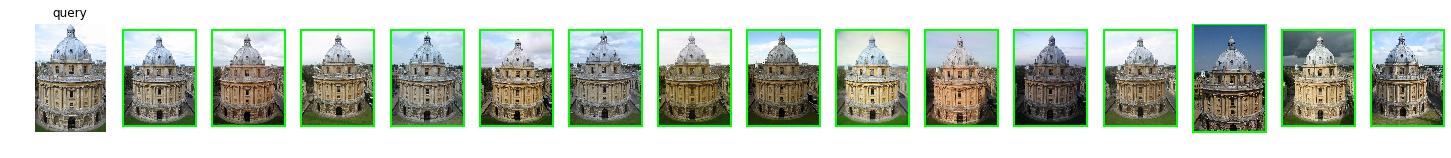

In [41]:
# load features and queries for the model trained with data augmentation
dfeats = np.load(models_dict['resnet18-rnk-lm-gem-da']['dataset'])
qfeats = np.load(models_dict['resnet18-rnk-lm-gem-da']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

Visualize the data with t-SNE (excluding unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.013s...
[t-SNE] Computed neighbors for 5063 samples in 4.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.216495
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.999496


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.442336
t-SNE done! Time elapsed: 15.350 seconds


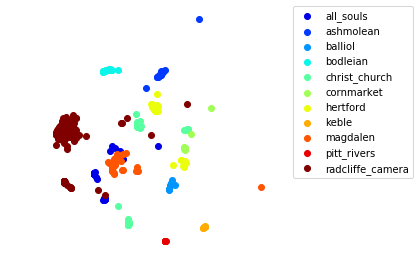

2-dimensional t-sne plot. Press enter to continue


In [42]:
do_tsne(dfeats, labels, classes, sec='1g')

**Question 20**: What is the difference in AP between a model that has trained with and without data augmentation?

**Question 21**: What about the clustering? Why do you believe some of the classes have not been adequately clustered yet?

## h) Multi-resolution

Another standard practice besides data augmentation is to consider different variations of the same picture but at different resolutions. There are multiple ways to combine features extracted from those images, such as average pooling or spatial pyramids.

Using the same model as the one in sect-1g, we now extract features at 4 different resolutions and average the outputs:

AP=98.29


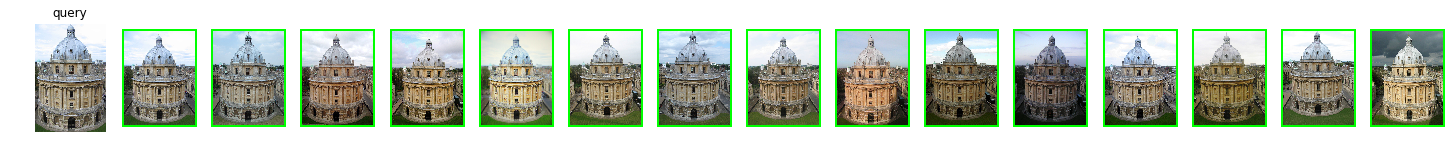

In [44]:
dfeats = np.load(models_dict['resnet18-rnk-lm-gem-da-mr']['dataset'])
qfeats = np.load(models_dict['resnet18-rnk-lm-gem-da-mr']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

Visualize the data with t-SNE (excluding unlabeled images)

applying PCA...
applying t-SNE...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5063 samples in 0.014s...
[t-SNE] Computed neighbors for 5063 samples in 4.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5063
[t-SNE] Computed conditional probabilities for sample 2000 / 5063
[t-SNE] Computed conditional probabilities for sample 3000 / 5063
[t-SNE] Computed conditional probabilities for sample 4000 / 5063
[t-SNE] Computed conditional probabilities for sample 5000 / 5063
[t-SNE] Computed conditional probabilities for sample 5063 / 5063
[t-SNE] Mean sigma: 0.210123
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.702126


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[t-SNE] KL divergence after 300 iterations: 2.366157
t-SNE done! Time elapsed: 14.330 seconds


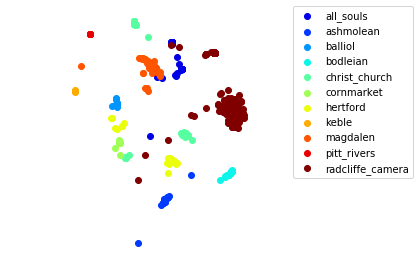

2-dimensional t-sne plot. Press enter to continue


In [45]:
do_tsne(dfeats, labels, classes, sec='1h')

**Question 22**: What is the difference in AP between a model that has trained with and without multi-resolution?

**Question 23**: What other data augmentation or pooling techniques would you suggest to improve results? Why?

# i) Improved architecture

Finally, we will now upgrade the backbone architecture to Resnet50.

AP=99.29


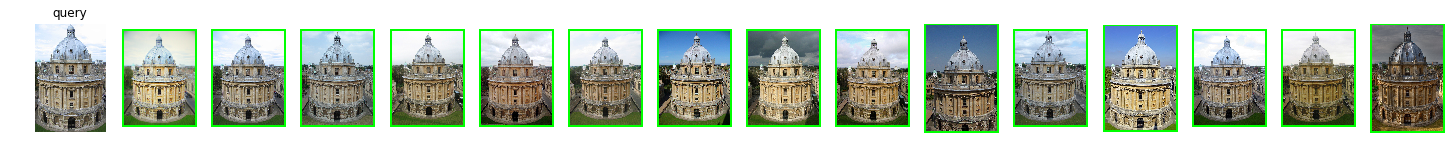

In [46]:
dfeats = np.load(models_dict['resnet50-rnk-lm-gem-da-mr']['dataset'])
qfeats = np.load(models_dict['resnet50-rnk-lm-gem-da-mr']['queries'])
dataset.vis_top(dfeats, q_idx, q_feat=qfeats[q_idx], ap_flag=True)

Visualize the data with t-SNE (excluding unlabeled images)

In [ ]:
do_tsne(dfeats, labels, classes, sec='1i')

**Question 24**: Why using a larger results in a higher AP? Is this always going to be the case? Why?

# Section 2: Testing

In this section, we will


## a) Robustness to input transformations

In [ ]:
q_idx = 42

Original image:

In [ ]:
q_feat1, raw_img = extract_query(model1, dataset, q_idx)
    dataset.vis_top(dfeats1, q_idx, q_feat1, ap_flag=True, query_image=raw_img)

Flipping the query image

In [ ]:
 q_feat1_flip, raw_img = extract_query(model1, dataset, q_idx, flip=True)
    dataset.vis_top(dfeats1, q_idx, q_feat1_flip, ap_flag=True, query_image=raw_img)
    # Q1: What is the impact of flipping the query image?

**Question**: What is the impact of flipping the query image?

Standard trick: aggregate both no-flipped and flipped representations

Original + flipped image    

In [ ]:
q_feat1_new = (q_feat1 + q_feat1_flip)
q_feat1_new = q_feat1_new / norm(q_feat1_new) # Don't forget to l2-normalize again :)
dataset.vis_top(dfeats1, q_idx, q_feat1_new, ap_flag=True)

Rotating the query image

Rotated image with vanilla model

In [ ]:
q_feat1_rot, raw_img = extract_query(model1, dataset, q_idx, rotate=10.)
dataset.vis_top(dfeats1, q_idx, q_feat1_rot, ap_flag=True, query_image=raw_img)

Rotated image with augmented model

In [ ]:
q_feat2_rot, raw_img = extract_query(model2, dataset, q_idx, rotate=10.)
dataset.vis_top(dfeats2, q_idx, q_feat2_rot, ap_flag=True, query_image=raw_img)

**Question**: Change the rotation value (in +/- degrees). 
- What is the impact of rotating it?
- Up to which degree of rotation is the result stable?
- How does the models (model1 trained without image rotation, model2 trained with) compare?

## b)  Robustness to resolution changes

Extract features using a larger input scale: 1200px

q_feat, raw_img = extract_query(model2, dataset, q_idx, scale=1200)
dataset.vis_top(dfeats2, q_idx, q_feat, ap_flag=True, query_image=raw_img, out_image_file=out_image)

**Question**: Resize the image by a factor. What is the impact of resizing it, especially to very low resolution?

## c) Queries with multi-scale features

In [ ]:
q_idx = 7

In [ ]:
# Extract features using a single input scale: 800px
q_feat, raw_img = extract_query(model1, dataset, q_idx, scale=800)
dataset.vis_top(dfeats1, q_idx, q_feat, ap_flag=True, query_image=raw_img)

# Aggregate features extracted at several input sizes: [600, 800, 1000, 1200]
features = [q_feat]
for scale in [600, 1000, 1200]:
    q_feat, raw_img = extract_query(model1, dataset, q_idx, scale=scale)
    features.append(q_feat)
q_feat_mr = np.mean(np.vstack(features), axis=0)
# L2 normalize again
q_feat_mr = q_feat_mr / norm(q_feat_mr)
dataset.vis_top(dfeats1, q_idx, q_feat_mr, ap_flag=True, query_image=raw_img)
# Q: What is the impact of using more scales?

## d) Robustness to compression (using PQ)

In [ ]:
dataset.vis_top(dfeats2, q_idx, ap_flag=True)

m = 256      # number of subquantizers
n_bits = 8   # bits allocated per subquantizer

feats_train = np.load(models_dict['resnet50-rnk-lm-gem-da']['training'])
print ('Training K-means for PQ...')
dataset.pq_train(feats_train, m, n_bits)

# dataset to encode
print ('Encoding features...')
dataset.pq_add(dfeats2)

# search:
dataset.vis_top(dfeats2, q_idx, pq_flag=True, ap_flag=True)
# Q1: How much memory (in bytes) is needed to store the compressed representation?
# Q2: What is the compression ratio?
# Q3: How did the compression affect the retrieval results?
# Q4: Change the values and m & n_bit and observe the change in retrieval performance.

In [ ]:
## Subsection 2e: Average query expansion

dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], nqe=3, ap_flag=True)
# nqe is the number of database items with which to expand the query.
# Q1: What is the impact of using different values of nqe?

In [ ]:
## Subsection 2f: alpha query expansion

dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], nqe=5, aqe=3.0, ap_flag=True)
# aqe is the value of alpha applied for alpha query expansion.
# Q1: How should nqe be chosen? Hint: What is the impact of low prec@K (where K is equivalent to nqe) on aqe?
# Q2: What is the impact of using different values of nqe, aqe?

In [ ]:
## Subsection 2g: Diffusion

dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], dfs='it:int20', ap_flag=True)
# Parameters for dfs are passed as strings with datatypes indicated. The default parameter string is:
#    'alpha:float0.99_it:int20_tol:float1e-6_gamma:float3_ks:100-30_trunc:bool_bsize:int100000_fsr:bool_IS:bool_wgt:bool_bs:bool_reg:bool_split:int0_gmp:bool'
#    strings passed to the dfs parameter overwrite the default parameters

# Q1: The affinity matrix is computed using the similarity measure s = <f_i, f_j>^alpha, where 0 < alpha <= 1.0. Use dfs='alpha:float<alpha>' for different values of alpha. What is the impact of changing it? E.g:
dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], dfs='alpha:float0.8', ap_flag=True)

# Q2: k_q is the number of database items to use for diffusion. Use dfs='ks:100-<k_q>' for different values of k_q. What is the impact of changing it? E.g:
dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], dfs='ks:100-5', ap_flag=True)

# Q3: trunc is the number of sub-rows and columns to use for diffusion. Use dfs='trunc:int<trunc>' for different values of trunc. What is the impact of changing it? E.g:
dataset.vis_top(dfeats2, q_idx, q_feat=qfeats2[q_idx], dfs='trunc:int2000', ap_flag=True)
# Q4: What is the maximum value of trunc and what case does it generalize to?
